In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [2]:
def read_root_file(root_file_path):
    with uproot.open(root_file_path) as root_file:
        efficiency_tree = root_file["photon_efficiencies_tree"]
        
        efficiencies = efficiency_tree["Efficiency"].array()
        efficiency_errors = efficiency_tree["EfficiencyError"].array()
        drift_distance = efficiency_tree["Energy"].array()
        
        return efficiencies, efficiency_errors, drift_distance

In [3]:
root_file_path = "/home/lane/Software/src/lumilar/system/analysis/data/photon_efficiencies.root"
efficiencies, efficiency_errors, energies = read_root_file(root_file_path)

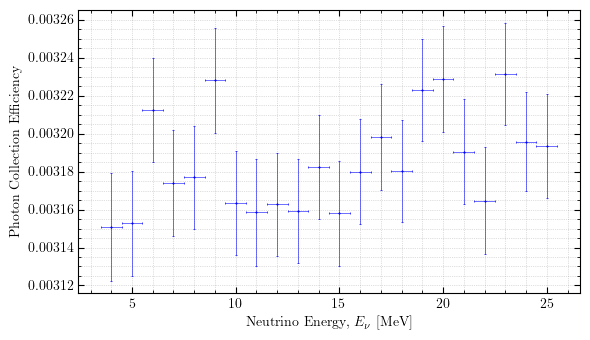

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use TeX-style font rendering
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(6, 3.5))

color = 'blue'

ax.errorbar(energies, efficiencies, yerr=efficiency_errors, xerr=1/2.0,
                marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor=color,
                markeredgecolor=color, ms=1, color=color, lw=0.0, elinewidth=0.4,
                zorder=10)

ax.set_xlabel(r"Neutrino Energy, $E_\nu$ [MeV]")
ax.set_ylabel(r"Photon Collection Efficiency")

# Set major and minor ticks to be inward
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)

# Enable minor ticks on both axes
ax.minorticks_on()

# Grid
ax.grid(which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()